In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re

from time import time
# from pandas.compat import StringIO

In [89]:
# data = pd.read_csv("./Datasets/Vicon Physical Action/Vicon Physical Action Data Set/sub1/aggressive/Elbowing.txt")
data = pd.read_csv("./Datasets/Vertebral Column/column_3C.dat")
# data = pd.read_csv("./Datasets/Vertebral Column/column_2C.dat", delimiter=" ")
data.columns=['pelvic incidence', 'pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'Class']
# data2 = data.apply(pd.to_numeric, errors='coerce')

# data3 = data2.dropna()
data

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class
0,39.06,10.06,25.02,29.00,114.41,4.56,DH
1,68.83,22.22,50.09,46.61,105.99,-3.53,DH
2,69.30,24.65,44.31,44.64,101.87,11.21,DH
3,49.71,9.65,28.32,40.06,108.17,7.92,DH
4,40.25,13.92,25.12,26.33,130.33,2.23,DH
...,...,...,...,...,...,...,...
304,47.90,13.62,36.00,34.29,117.45,-4.25,NO
305,53.94,20.72,29.22,33.22,114.37,-0.42,NO
306,61.45,22.69,46.17,38.75,125.67,-2.71,NO
307,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [90]:
data.loc[:, "Class"] = pd.factorize(data.loc[:, "Class"])[0]

data[["Class"]].head()

nilai_unik = data.loc[:, "Class"].value_counts()
print("\nFrekuensi isi kolom 'Class' : ")
print(nilai_unik)

nilai_unik = data.loc[:, "pelvic incidence"].value_counts()
print("\nFrekuensi isi kolom 'pelvic incidence' : ")
print(nilai_unik)


Frekuensi isi kolom 'Class' : 
1    150
2    100
0     59
Name: Class, dtype: int64

Frekuensi isi kolom 'pelvic incidence' : 
74.72    2
50.91    2
49.71    2
54.92    2
53.94    2
        ..
77.41    1
49.78    1
70.40    1
79.94    1
33.84    1
Name: pelvic incidence, Length: 301, dtype: int64


In [91]:
data.loc[:, "Class"] = pd.factorize(data.loc[:, "Class"])[0]
# Tampilkan hasilnya
data[["Class"]].head

#tampilkan nilai/isi kolom Class
class_list = data["Class"].tolist()

print(class_list)

nilai_unik = data.loc[:, "Class"].value_counts()
print("\nFrekuensi isi kolom \"Class\":")
print(nilai_unik)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

Frekuensi isi kolom "Class":
1    150
2    100
0     59
Name: Class, dt

In [92]:
patient_number = data.shape[0]

Disk_Hernia_patient = data.loc[(data['Class']==0)]
no_disk_hernia_patient = Disk_Hernia_patient.shape[0]

Spondylolisthesis_patient = data.loc[(data['Class']==1)]
no_Spondylolisthesis_patient = Spondylolisthesis_patient.shape[0]

Normal_patient = data.loc[(data['Class']==2)]
no_normal_patient = Normal_patient.shape[0]

normal_percentage = no_normal_patient*100/patient_number
diskHernia_percentage = no_disk_hernia_patient*100/patient_number
spondylolisthesis_percentage = no_Spondylolisthesis_patient*100/patient_number

print(patient_number)
print("normal patient : {}".format(no_normal_patient))
print("Disk Hernia patient : {}".format(no_disk_hernia_patient))
print("Spondylolisthesis patient : {}".format(no_Spondylolisthesis_patient))
print("normal patient : {:.2f}".format(normal_percentage))
print("normal patient : {:.2f}".format(diskHernia_percentage))
print("normal patient : {:.2f}".format(spondylolisthesis_percentage))



309
normal patient : 100
Disk Hernia patient : 59
Spondylolisthesis patient : 150
normal patient : 32.36
normal patient : 19.09
normal patient : 48.54


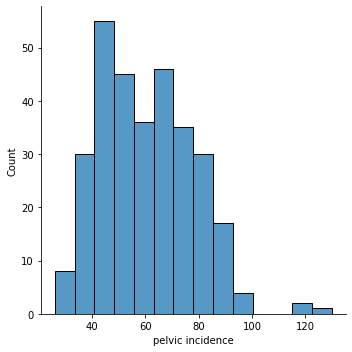

In [93]:
sns.displot(data["pelvic incidence"])

(-1.1293979363820894,
 1.1013999017324805,
 -1.108342391333693,
 1.1268023849680553)

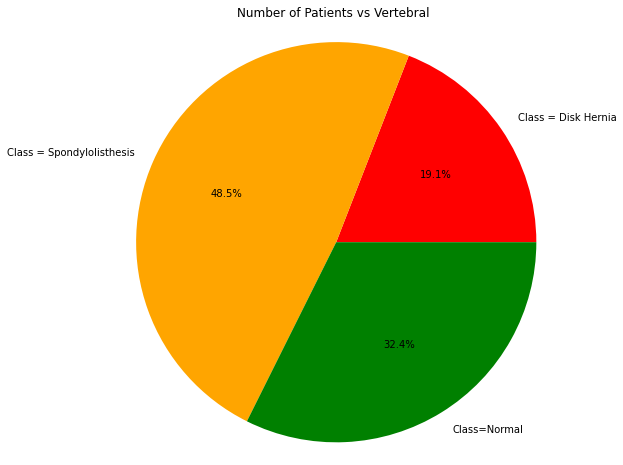

In [103]:
from turtle import color


plt.figure(figsize=(8,8))
labels = 'Class = Disk Hernia', 'Class = Spondylolisthesis', 'Class=Normal'
plt.title('Number of Patients vs Vertebral')
sizes = [no_disk_hernia_patient, no_Spondylolisthesis_patient, no_normal_patient]
colors = ['red', 'orange','green']

#plot pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
# plt.show()

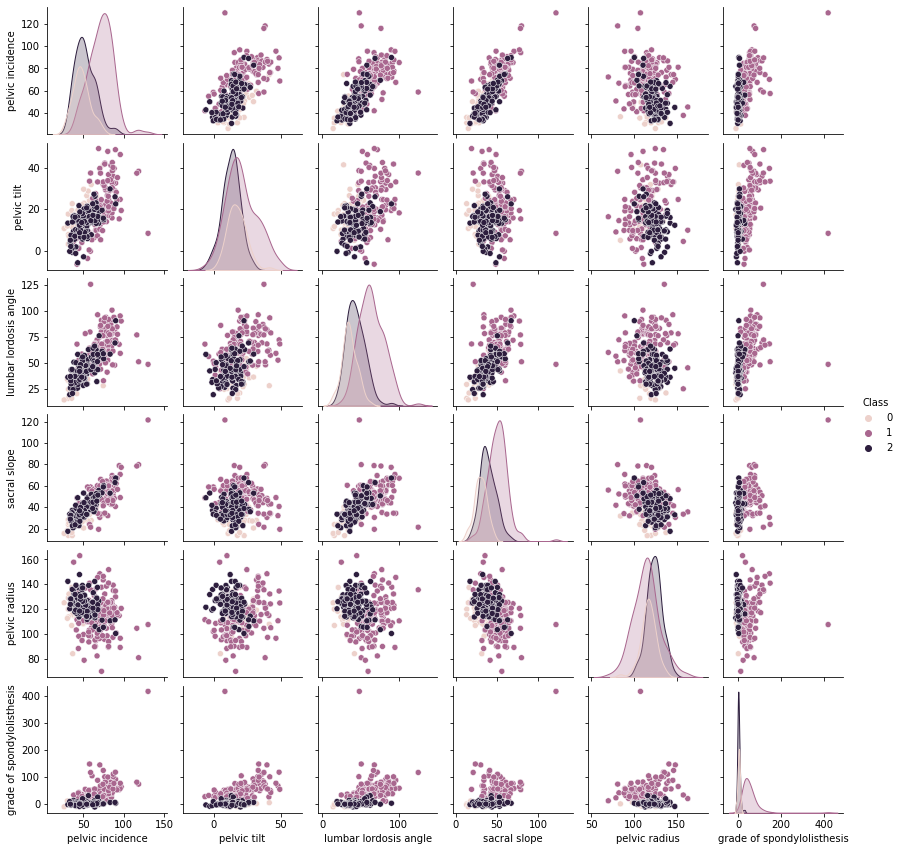

In [95]:
sns.pairplot(data, hue="Class", height=2)

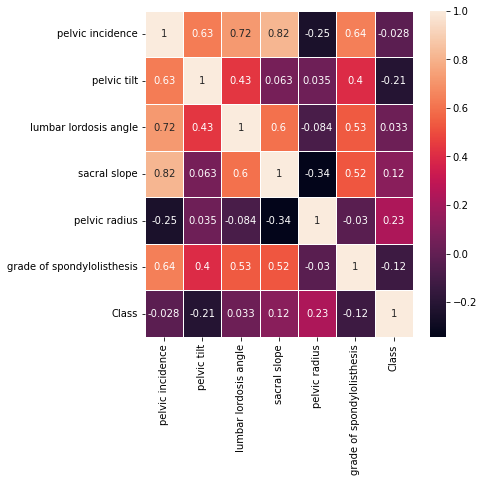

In [96]:
correlation = data.corr()

plt.figure(figsize=(6,6))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor='white')

In [97]:
data_train = data.sample(frac=0.8)
x_train = np.array(data_train.iloc[:,:-1])
y_train = np.array(data_train["Class"])

data_test = data.drop(data_train.index)
x_test = np.array(data_test.iloc[:,:-1])
y_test = np.array(data_test["Class"])

print("banyaknya training data : ", len(x_train))
print("banyaknya test data : ", len(x_test))
print(x_train)
print(y_train)

banyaknya training data :  247
banyaknya test data :  62
[[ 32.09   6.99  36.    25.1  132.26   6.41]
 [ 69.76  19.28  48.5   50.48  96.49  51.17]
 [ 38.51  16.96  35.11  21.54 127.63   7.99]
 ...
 [ 96.66  19.46  90.21  77.2  120.67  64.08]
 [ 78.43  33.43  76.28  45.   138.55  77.16]
 [ 61.54  19.68  52.89  41.86 118.69   4.82]]
[0 1 2 1 1 1 2 1 2 1 0 2 2 2 1 1 1 0 2 0 2 1 0 0 2 1 1 1 1 1 1 2 1 2 0 0 1
 1 1 1 2 1 1 1 2 2 1 0 1 1 2 0 0 1 1 1 1 0 0 2 2 1 1 1 1 2 1 1 1 1 1 1 1 2
 0 2 1 0 2 2 2 2 1 1 0 1 1 2 1 2 2 1 1 2 2 2 2 2 0 1 2 2 1 2 0 1 1 1 1 1 1
 1 1 0 2 1 1 1 1 2 0 0 2 1 1 1 2 2 1 2 0 1 0 1 2 0 2 1 1 2 0 1 1 0 2 1 2 2
 1 1 2 2 1 1 1 1 0 2 1 1 1 2 1 2 0 2 0 2 2 0 1 2 1 1 1 2 2 0 1 1 1 1 2 0 0
 1 2 0 2 1 2 1 1 2 1 1 2 1 0 1 2 1 0 1 2 2 2 0 1 2 1 0 2 0 1 1 1 1 0 1 1 2
 2 2 2 1 1 2 0 0 0 2 2 1 2 2 0 0 2 1 2 2 1 0 1 1 2]


Naive Bayes Gaussian NB

In [98]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

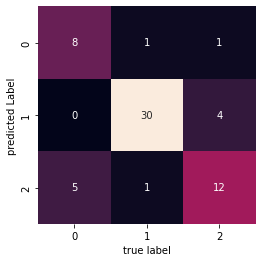

In [99]:
labels = model.predict(x_test) # jadilah modelnya, dan diuji disini
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted Label")
plt.show()

In [100]:
from sklearn import metrics

# model accuracy, how often is the classifier connect?
print("accuracy: {:,.2f}".format(metrics.accuracy_score(y_test, labels)))

accuracy: 0.81


K-NN Classifier

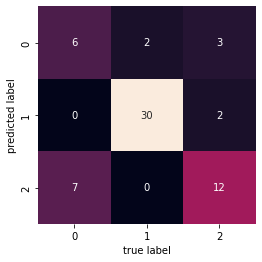

In [101]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3) #n_neighbors itu ngitung keatas, bawah, kiri, kanan berapa petak koordinat

model.fit(x_train,y_train) # Ini perintah training data

#predict output
labels = model.predict(x_test) # ini perintah untuk prediksi data
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.show()


In [102]:
print("Accuracy: {:,.2f}".format(metrics.accuracy_score(y_test, labels)))

Accuracy: 0.77
